In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [2]:
# checking the data
train_revised = pd.read_csv("Data/train_revised.csv")
train_revised.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49


In [3]:
# drop columns we dont need
train_revised.drop(columns = ["payment_method", "payment_receipt", "travel_to"], inplace=True)

In [4]:
# drop duplicates. (cant have the same seat number on the same ride_id twice)
train_revised.drop_duplicates(inplace = True)

In [5]:
# get rid of columns we don't need
train_revised.drop(columns = ["seat_number"], inplace=True)

In [6]:
# need to add column for number of tickets sold for each ride_id
number_of_ticket = train_revised.groupby("ride_id").travel_time.count()

In [7]:
# drop duplicate rows. We want each ride_id to be a unique observation.
train_revised.drop_duplicates(inplace=True)

In [8]:
# set index to ride_id
train_revised.set_index("ride_id", inplace=True)

In [9]:
# add ticket column
train_revised["number_of_ticket"] = number_of_ticket

In [10]:
train_revised.head()

,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_ticket
ride_id,,,,,,
1442,17-10-17,7:15,Migori,Bus,49,1
5437,19-11-17,7:12,Migori,Bus,49,1
5710,26-11-17,7:05,Keroka,Bus,49,1
5777,27-11-17,7:10,Homa Bay,Bus,49,5
5778,27-11-17,7:12,Migori,Bus,49,30


In [11]:
# now we want to add a column with the time stuff together and make it a time series data type
train_revised["full_date"] = train_revised.travel_date + " " + train_revised.travel_time 

In [12]:
train_revised.head()

,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_ticket,full_date
ride_id,,,,,,,
1442,17-10-17,7:15,Migori,Bus,49,1,17-10-17 7:15
5437,19-11-17,7:12,Migori,Bus,49,1,19-11-17 7:12
5710,26-11-17,7:05,Keroka,Bus,49,1,26-11-17 7:05
5777,27-11-17,7:10,Homa Bay,Bus,49,5,27-11-17 7:10
5778,27-11-17,7:12,Migori,Bus,49,30,27-11-17 7:12


In [13]:
# change to time series data type
train_revised.full_date = pd.to_datetime(train_revised.full_date, infer_datetime_format=True)

In [14]:
# add column with week day of ride_id
train_revised["day_of_week"] = train_revised.full_date.dt.weekday

In [15]:
# add column with month of ride_id
train_revised["month"]= train_revised.full_date.dt.month

In [16]:
# now its time to group times in morning, afternoon, evening, and night. Feel free to change around the bounds if you like.

def get_travel_time_type(hour):
    return (
        "morning" if 5 <= hour <= 11
        else
        "afternoon" if 12 <= hour <= 17
        else
        "evening" if 18 <= hour <= 22
        else
        "night"
    )
train_revised['travel_time_type'] = train_revised.full_date.apply(lambda x: get_travel_time_type(x.hour)) 

In [17]:
train_revised.head()

,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_ticket,full_date,day_of_week,month,travel_time_type
ride_id,,,,,,,,,,
1442,17-10-17,7:15,Migori,Bus,49,1,2017-10-17 07:15:00,1,10,morning
5437,19-11-17,7:12,Migori,Bus,49,1,2017-11-19 07:12:00,6,11,morning
5710,26-11-17,7:05,Keroka,Bus,49,1,2017-11-26 07:05:00,6,11,morning
5777,27-11-17,7:10,Homa Bay,Bus,49,5,2017-11-27 07:10:00,0,11,morning
5778,27-11-17,7:12,Migori,Bus,49,30,2017-11-27 07:12:00,0,11,morning


In [18]:
# getting rid of columns we don't need
#If you think we need the travel_time and travel_date columns seperately feel free to edit this
train_revised.drop(columns = ["travel_time", "travel_date", "car_type"], inplace=True)

In [19]:
# making month and day of week columns more easily readable
train_revised.day_of_week.replace({0:"Monday", 1:"Tuesday", 2:"Wednesday", 3:"Thursday", 4:"Friday", 
                                   5:"Saturday", 6:"Sunday"}, inplace=True)
train_revised.month.replace({1:"January", 2:"February", 3:"March", 4:"April", 5:"May", 
                                   6:"June", 7:"July", 8:"August", 9:"September", 10:"October", 11:"November", 12:"December"}, inplace=True)

In [20]:
train_revised.head()

,travel_from,max_capacity,number_of_ticket,full_date,day_of_week,month,travel_time_type
ride_id,,,,,,,
1442,Migori,49,1,2017-10-17 07:15:00,Tuesday,October,morning
5437,Migori,49,1,2017-11-19 07:12:00,Sunday,November,morning
5710,Keroka,49,1,2017-11-26 07:05:00,Sunday,November,morning
5777,Homa Bay,49,5,2017-11-27 07:10:00,Monday,November,morning
5778,Migori,49,30,2017-11-27 07:12:00,Monday,November,morning


In [21]:
# changing categorical columns to category type, some ordered

months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", 
          "Sunday"]
train_revised.month = pd.Categorical(train_revised['month'], categories=months, ordered=True)
train_revised.day_of_week = pd.Categorical(train_revised['day_of_week'], categories=days, ordered=True)
train_revised.max_capacity = train_revised.max_capacity.astype("category")
train_revised.travel_from = train_revised.travel_from.astype("category")
train_revised.travel_time_type = train_revised.travel_time_type.astype("category")

In [22]:
# Shifting the number_of_ticket column to the end to make it look nicer
df1 = train_revised.pop('number_of_ticket')
train_revised['number_of_ticket'] = df1

In [23]:
train_revised.head()

,travel_from,max_capacity,full_date,day_of_week,month,travel_time_type,number_of_ticket
ride_id,,,,,,,
1442,Migori,49,2017-10-17 07:15:00,Tuesday,October,morning,1
5437,Migori,49,2017-11-19 07:12:00,Sunday,November,morning,1
5710,Keroka,49,2017-11-26 07:05:00,Sunday,November,morning,1
5777,Homa Bay,49,2017-11-27 07:10:00,Monday,November,morning,5
5778,Migori,49,2017-11-27 07:12:00,Monday,November,morning,30


In [24]:
#Now its data analysis time! Although we could add some more columns or something if you guys want.

<AxesSubplot:xlabel='number_of_ticket', ylabel='Count'>

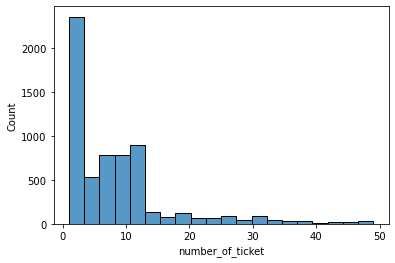

In [25]:
# Most of the rides have 10 or less tickets.
sns.histplot(train_revised.number_of_ticket, bins=20)

<AxesSubplot:xlabel='max_capacity', ylabel='count'>

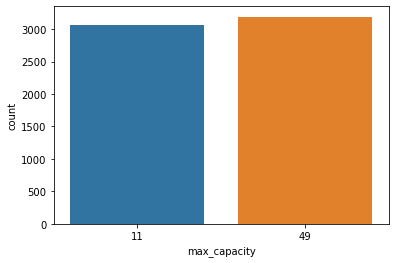

In [26]:
# There are about the same amount of shuttles and buses in the data
sns.countplot(train_revised.max_capacity)

<AxesSubplot:xlabel='day_of_week', ylabel='count'>

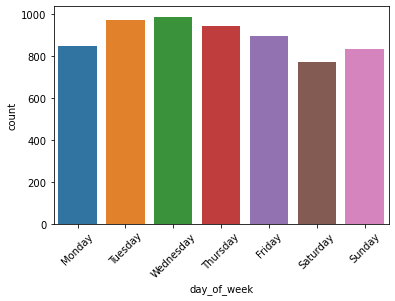

In [27]:
# It seems that we have less weekend trips in the data but still relatively same amount for each week day.
import matplotlib.pyplot as plt
plt.xticks(rotation=45)
sns.countplot(train_revised.day_of_week)

<AxesSubplot:xlabel='travel_from', ylabel='count'>

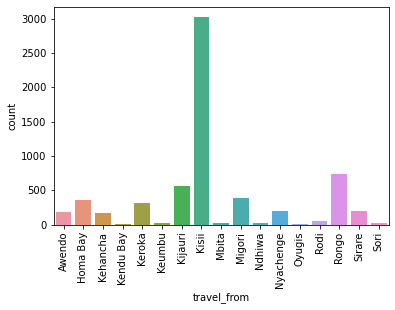

In [28]:
# Almost half of the trips are from Kisii
plt.xticks(rotation=90)
sns.countplot(train_revised.travel_from)

In [29]:
# It seems that shuttles from Kisii are the majority of the observations in the data
pd.crosstab(train_revised.travel_from, train_revised.max_capacity)

max_capacity,11,49
travel_from,,
Awendo,0,185
Homa Bay,0,356
Kehancha,0,172
Kendu Bay,0,1
Keroka,149,163
Keumbu,17,3
Kijauri,395,161
Kisii,2499,521
Mbita,0,21


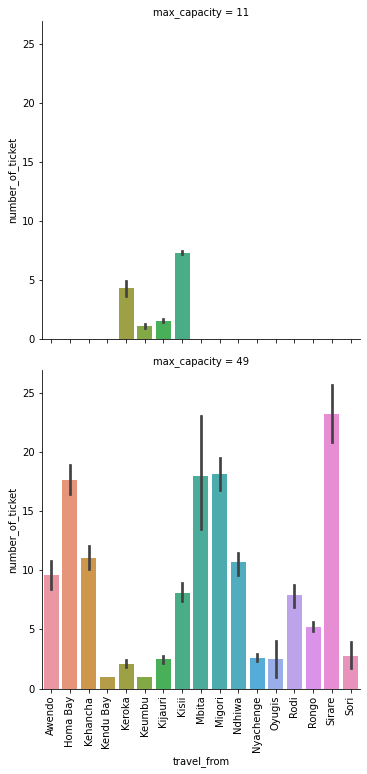

In [30]:
travel_from_bar = sns.catplot(x = "travel_from", y= "number_of_ticket", row = "max_capacity", data = train_revised, kind = "bar")
travel_from_bar.set_xticklabels(rotation=90)

<AxesSubplot:xlabel='travel_time_type', ylabel='count'>

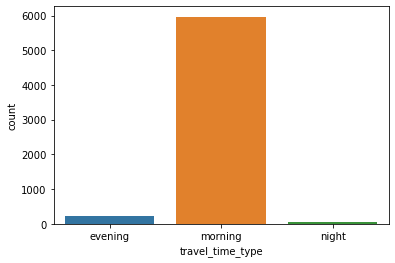

In [31]:
# There appear to be no afternoon trips. Most trips occur in the morning.
sns.countplot(train_revised.travel_time_type)

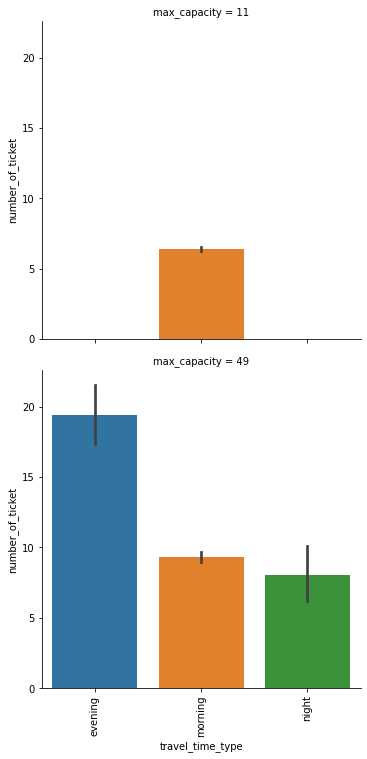

In [32]:
# evening trips sell the most tickets
travel_type_bar = sns.catplot(x = "travel_time_type", y= "number_of_ticket", row = "max_capacity", data = train_revised, kind = "bar")
travel_type_bar.set_xticklabels(rotation=90)

In [33]:
#Shuttles are only in the morning
pd.crosstab(train_revised.travel_time_type, train_revised.max_capacity)

max_capacity,11,49
travel_time_type,,
evening,0,225
morning,3060,2903
night,0,61


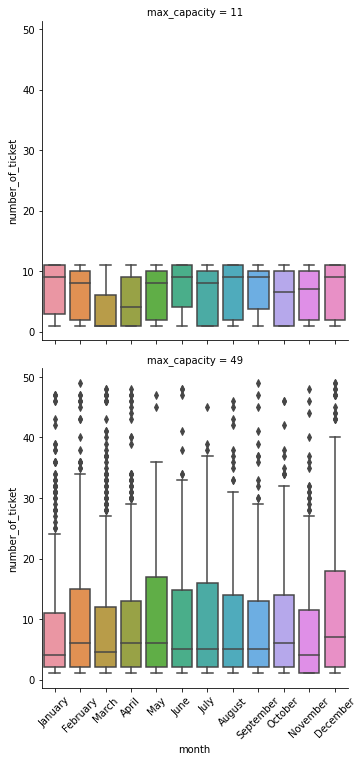

In [34]:
ticket_per_month = sns.catplot(x = "month", y= "number_of_ticket", row = "max_capacity", data = train_revised, kind = "box")
ticket_per_month.set_xticklabels(rotation=45)

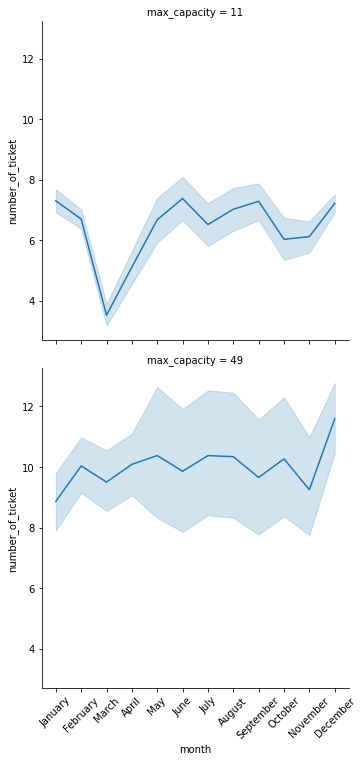

In [35]:
# It seems that monthly trends are differnt for shuttles and buses. Shuttles appear to be more volatile in monthly ticket sales.

ticket_per_month_line = sns.relplot(x = "month", y= "number_of_ticket", row = "max_capacity", data = train_revised, kind = "line")
ticket_per_month_line.set_xticklabels(rotation=45)

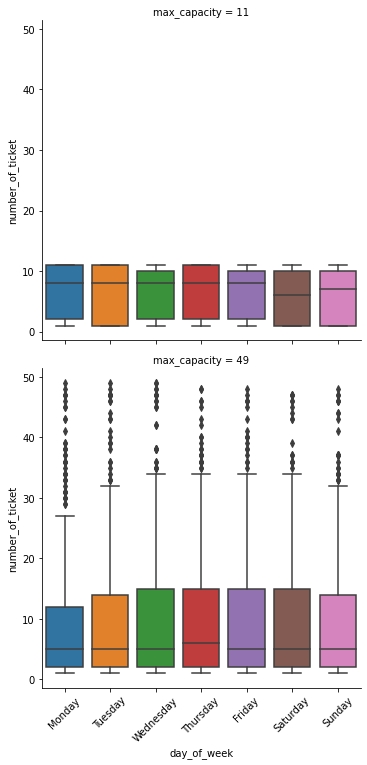

In [36]:
ticket_per_day = sns.catplot(x = "day_of_week", y= "number_of_ticket", row = "max_capacity", data = train_revised, kind = "box")
ticket_per_day.set_xticklabels(rotation=45)

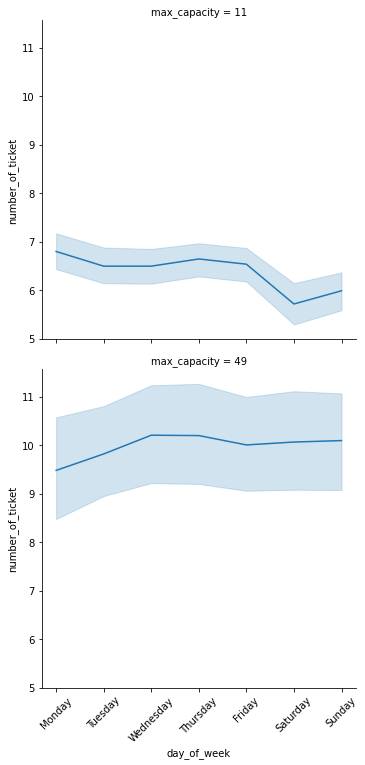

In [37]:
# Shuttles appear to sell less on the weekend and more during the weekdays. Buses sell the least during Monday and Tuesday but stabilize afterwards.
ticket_per_day_line = sns.relplot(x = "day_of_week", y= "number_of_ticket", row = "max_capacity", data = train_revised, kind = "line")
ticket_per_day_line.set_xticklabels(rotation=45)

In [38]:
# Time for a linear regression.

In [39]:
train_revised.head()

,travel_from,max_capacity,full_date,day_of_week,month,travel_time_type,number_of_ticket
ride_id,,,,,,,
1442,Migori,49,2017-10-17 07:15:00,Tuesday,October,morning,1
5437,Migori,49,2017-11-19 07:12:00,Sunday,November,morning,1
5710,Keroka,49,2017-11-26 07:05:00,Sunday,November,morning,1
5777,Homa Bay,49,2017-11-27 07:10:00,Monday,November,morning,5
5778,Migori,49,2017-11-27 07:12:00,Monday,November,morning,30


In [40]:
# We need to turn our categorical variables into binary variables called dummy variables
train_lin = pd.get_dummies(train_revised[["travel_from","max_capacity", "day_of_week", "month", "travel_time_type"]])
train_lin.head()

,travel_from_Awendo,travel_from_Homa Bay,travel_from_Kehancha,travel_from_Kendu Bay,travel_from_Keroka,travel_from_Keumbu,travel_from_Kijauri,travel_from_Kisii,travel_from_Mbita,travel_from_Migori,...,month_June,month_July,month_August,month_September,month_October,month_November,month_December,travel_time_type_evening,travel_time_type_morning,travel_time_type_night
ride_id,,,,,,,,,,,,,,,,,,,,,
1442,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
5437,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
5710,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
5777,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
5778,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0


In [41]:
# We need to get rid of one of the dummy variables from each category to properly use the linear regression
train_lin.drop(columns = ["travel_from_Awendo", "month_January", "travel_time_type_morning", "day_of_week_Monday", "max_capacity_11"], inplace=True)

In [42]:
# Get linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X= train_lin, y=train_revised.number_of_ticket)

LinearRegression()

In [89]:
# Checking out the intercept
model.intercept_

10.188133268104385

In [43]:
# Checking out the coefficients
pd.Series(model.coef_, index=train_lin.columns)

travel_from_Homa Bay         8.050304
travel_from_Kehancha         1.634328
travel_from_Kendu Bay       -8.634869
travel_from_Keroka          -7.376468
travel_from_Keumbu          -9.320143
travel_from_Kijauri         -8.466101
travel_from_Kisii           -3.186373
travel_from_Mbita            8.344279
travel_from_Migori           8.366519
travel_from_Ndhiwa           1.296329
travel_from_Nyachenge       -6.807445
travel_from_Oyugis          -7.829829
travel_from_Rodi            -1.717968
travel_from_Rongo           -4.466816
travel_from_Sirare          10.166081
travel_from_Sori            -6.722626
max_capacity_49             -0.771419
day_of_week_Tuesday          0.112210
day_of_week_Wednesday        0.244879
day_of_week_Thursday         0.264828
day_of_week_Friday           0.218154
day_of_week_Saturday         0.059659
day_of_week_Sunday          -0.079230
month_February              -0.004085
month_March                 -1.024394
month_April                 -0.116404
month_May   

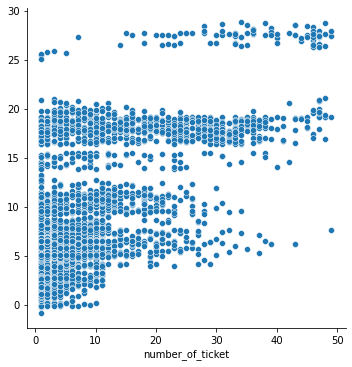

In [44]:
# Lets see how well our linear regression did. It doesnt look that good to be honest but thats ok.
ticket_pred = model.predict(train_lin)
sns.relplot(x=train_revised.number_of_ticket, y=ticket_pred)

In [45]:
# just cheking the MSE for fun
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mean_squared_error(y_true=train_revised.number_of_ticket, y_pred= ticket_pred)

45.573838706215206

In [46]:
# Our model accounts for 38.4% of the data. We would like this to be better
print('R squared =', round(np.corrcoef(train_revised.number_of_ticket, y=ticket_pred)[0,1]**2,3))

R squared = 0.384


In [47]:
train_lin_simple = train_lin.columns

In [48]:
# Lets add some interaction terms
train_lin_interaction = train_lin
for name in train_lin.columns:
    train_lin_interaction["max_capacity_49"+ name] = train_lin[name] * train_lin.max_capacity_49
    

In [49]:
train_lin.head()

,travel_from_Homa Bay,travel_from_Kehancha,travel_from_Kendu Bay,travel_from_Keroka,travel_from_Keumbu,travel_from_Kijauri,travel_from_Kisii,travel_from_Mbita,travel_from_Migori,travel_from_Ndhiwa,...,max_capacity_49month_May,max_capacity_49month_June,max_capacity_49month_July,max_capacity_49month_August,max_capacity_49month_September,max_capacity_49month_October,max_capacity_49month_November,max_capacity_49month_December,max_capacity_49travel_time_type_evening,max_capacity_49travel_time_type_night
ride_id,,,,,,,,,,,,,,,,,,,,,
1442,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
5437,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
5710,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5777,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5778,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [50]:
train_lin_interaction.drop(columns="max_capacity_49max_capacity_49", inplace=True)
train_lin_interaction["max_capacity_49"] = train_lin.max_capacity_49

In [51]:
train_lin_interaction.head()

,travel_from_Homa Bay,travel_from_Kehancha,travel_from_Kendu Bay,travel_from_Keroka,travel_from_Keumbu,travel_from_Kijauri,travel_from_Kisii,travel_from_Mbita,travel_from_Migori,travel_from_Ndhiwa,...,max_capacity_49month_May,max_capacity_49month_June,max_capacity_49month_July,max_capacity_49month_August,max_capacity_49month_September,max_capacity_49month_October,max_capacity_49month_November,max_capacity_49month_December,max_capacity_49travel_time_type_evening,max_capacity_49travel_time_type_night
ride_id,,,,,,,,,,,,,,,,,,,,,
1442,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
5437,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
5710,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5777,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5778,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [52]:
from sklearn.model_selection import cross_val_score
cv_fullmod = cross_val_score(estimator=model, X=train_lin_interaction, y=train_revised.number_of_ticket, scoring="neg_mean_squared_error", cv=5)
cv_simplemod = cross_val_score(estimator=model, X=train_lin[train_lin_simple], y=train_revised.number_of_ticket, scoring="neg_mean_squared_error", cv=5)

print('MSE for the full model:', -cv_fullmod.mean())
print('MSE for the simple model:', -cv_simplemod.mean())

MSE for the full model: 1.2907661718125465e+26
MSE for the simple model: 49.31920458149476


In [53]:
# ok adding the max capacity interaction terms to everything was a really bad idea. Maybe only add a few interaction terms

In [79]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(train_lin_interaction)
X = pd.DataFrame(X, columns = train_lin_interaction.columns)
X.head()

,travel_from_Homa Bay,travel_from_Kehancha,travel_from_Kendu Bay,travel_from_Keroka,travel_from_Keumbu,travel_from_Kijauri,travel_from_Kisii,travel_from_Mbita,travel_from_Migori,travel_from_Ndhiwa,...,max_capacity_49month_May,max_capacity_49month_June,max_capacity_49month_July,max_capacity_49month_August,max_capacity_49month_September,max_capacity_49month_October,max_capacity_49month_November,max_capacity_49month_December,max_capacity_49travel_time_type_evening,max_capacity_49travel_time_type_night
0,-0.245786,-0.168236,-0.012651,-0.229242,-0.056664,-0.312512,-0.967096,-0.058068,3.897322,-0.059439,...,-0.129456,-0.136315,-0.142869,-0.146899,-0.145758,7.057257,-0.169739,-0.274881,-0.193263,-0.099286
1,-0.245786,-0.168236,-0.012651,-0.229242,-0.056664,-0.312512,-0.967096,-0.058068,3.897322,-0.059439,...,-0.129456,-0.136315,-0.142869,-0.146899,-0.145758,-0.141698,5.891398,-0.274881,-0.193263,-0.099286
2,-0.245786,-0.168236,-0.012651,4.362207,-0.056664,-0.312512,-0.967096,-0.058068,-0.256586,-0.059439,...,-0.129456,-0.136315,-0.142869,-0.146899,-0.145758,-0.141698,5.891398,-0.274881,-0.193263,-0.099286
3,4.068583,-0.168236,-0.012651,-0.229242,-0.056664,-0.312512,-0.967096,-0.058068,-0.256586,-0.059439,...,-0.129456,-0.136315,-0.142869,-0.146899,-0.145758,-0.141698,5.891398,-0.274881,-0.193263,-0.099286
4,-0.245786,-0.168236,-0.012651,-0.229242,-0.056664,-0.312512,-0.967096,-0.058068,3.897322,-0.059439,...,-0.129456,-0.136315,-0.142869,-0.146899,-0.145758,-0.141698,5.891398,-0.274881,-0.193263,-0.099286


In [81]:
# trying out an advanced linear regression technique with a ton of interaction terms
from sklearn.feature_selection import RFECV
rfe = RFECV(estimator=model, cv=5, scoring="neg_mean_squared_error")
rfe.fit(X=X, y=train_revised.number_of_ticket)
print('Selected', rfe.n_features_, 'features:')
X.columns[rfe.support_]

Selected 17 features:


Index(['travel_from_Kehancha', 'travel_from_Mbita', 'travel_from_Ndhiwa',
       'travel_from_Rodi', 'travel_from_Rongo', 'travel_from_Sirare',
       'travel_from_Sori', 'travel_time_type_night',
       'max_capacity_49travel_from_Kehancha',
       'max_capacity_49travel_from_Mbita', 'max_capacity_49travel_from_Ndhiwa',
       'max_capacity_49travel_from_Oyugis', 'max_capacity_49travel_from_Rodi',
       'max_capacity_49travel_from_Rongo', 'max_capacity_49travel_from_Sirare',
       'max_capacity_49travel_from_Sori',
       'max_capacity_49travel_time_type_night'],
      dtype='object')

In [85]:
# MSE is really bad here still
cv_rfe = cross_val_score(estimator=model, X=X[X.columns[rfe.support_]], y=train_revised.number_of_ticket, scoring="neg_mean_squared_error", cv=5)
print('RFE MSE:', -cv_rfe.mean())

RFE MSE: 1.7285907196696792e+22


In [87]:
# testing some more stuff
rfe = RFECV(estimator=model, cv=5, scoring="neg_mean_squared_error")
rfe.fit(X=X[train_lin_simple], y=train_revised.number_of_ticket)
print('Selected', rfe.n_features_, 'features:')
X[train_lin_simple].columns[rfe.support_]

Selected 9 features:


Index(['travel_from_Homa Bay', 'travel_from_Keroka', 'travel_from_Kijauri',
       'travel_from_Kisii', 'travel_from_Migori', 'travel_from_Nyachenge',
       'travel_from_Rongo', 'travel_from_Sirare', 'travel_time_type_evening'],
      dtype='object')

In [88]:
# this seems ok
cv_rfe = cross_val_score(estimator=model, X=X[X[train_lin_simple].columns[rfe.support_]], y=train_revised.number_of_ticket, scoring="neg_mean_squared_error", cv=5)
print('RFE MSE:', -cv_rfe.mean())

RFE MSE: 48.74415089016573


In [54]:
# now we need to include the data we need to predict and clean it
test = pd.read_csv("Data/test_questions.csv")

In [55]:
test.head()

,ride_id,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,247,2018-05-07,07:06,Kisii,Nairobi,Bus,49
1,256,2018-05-06,11:08,Kisii,Nairobi,shuttle,11
2,275,2018-05-04,05:00,Kisii,Nairobi,shuttle,11
3,285,2018-05-04,09:10,Kisii,Nairobi,shuttle,11
4,286,2018-05-04,09:20,Kisii,Nairobi,shuttle,11


In [56]:
test["full_date"] = test.travel_date + " " + test.travel_time

In [57]:
test.drop(columns=["travel_to", "car_type", "travel_date", "travel_time"], inplace=True)

In [58]:
test.head()

,ride_id,travel_from,max_capacity,full_date
0,247,Kisii,49,2018-05-07 07:06
1,256,Kisii,11,2018-05-06 11:08
2,275,Kisii,11,2018-05-04 05:00
3,285,Kisii,11,2018-05-04 09:10
4,286,Kisii,11,2018-05-04 09:20


In [59]:
test.full_date = pd.to_datetime(test.full_date, infer_datetime_format=True)

In [60]:
test["day_of_week"] = test.full_date.dt.weekday
test["month"] = test.full_date.dt.month
test['travel_time_type'] = test.full_date.apply(lambda x: get_travel_time_type(x.hour)) 

In [61]:
test.day_of_week.replace({0:"Monday", 1:"Tuesday", 2:"Wednesday", 3:"Thursday", 4:"Friday", 
                                   5:"Saturday", 6:"Sunday"}, inplace=True)
test.month.replace({1:"January", 2:"February", 3:"March", 4:"April", 5:"May", 
                                   6:"June", 7:"July", 8:"August", 9:"September", 10:"October", 11:"November", 12:"December"}, inplace=True)

In [62]:
test.month = pd.Categorical(test['month'], categories=months, ordered=True)
test.day_of_week = pd.Categorical(test['day_of_week'], categories=days, ordered=True)
test.max_capacity = test.max_capacity.astype("category")
test.travel_from = test.travel_from.astype("category")
test.travel_time_type = test.travel_time_type.astype("category")

In [63]:
test.set_index("ride_id", inplace=True)

In [64]:
test.head()

,travel_from,max_capacity,full_date,day_of_week,month,travel_time_type
ride_id,,,,,,
247,Kisii,49,2018-05-07 07:06:00,Monday,May,morning
256,Kisii,11,2018-05-06 11:08:00,Sunday,May,morning
275,Kisii,11,2018-05-04 05:00:00,Friday,May,morning
285,Kisii,11,2018-05-04 09:10:00,Friday,May,morning
286,Kisii,11,2018-05-04 09:20:00,Friday,May,morning


In [90]:
test.month.count()

1111

In [65]:
test_lin = pd.get_dummies(test)

In [66]:
test_lin.drop(columns = ["travel_from_Awendo", "month_January", "travel_time_type_morning", "day_of_week_Monday", "max_capacity_11", "full_date"], inplace=True)

In [71]:
# add these to make sure everything works
test_lin["travel_from_Keumbu"] = 0
test_lin["travel_from_Kendu Bay"] = 0

In [73]:
test_lin.head()

,travel_from_Homa Bay,travel_from_Kehancha,travel_from_Keroka,travel_from_Kijauri,travel_from_Kisii,travel_from_Mbita,travel_from_Migori,travel_from_Ndhiwa,travel_from_Nyachenge,travel_from_Oyugis,...,month_July,month_August,month_September,month_October,month_November,month_December,travel_time_type_evening,travel_time_type_night,travel_from_Keumbu,travel_from_Kendu Bay
ride_id,,,,,,,,,,,,,,,,,,,,,
247,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
256,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
275,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
285,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
286,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
train_lin[train_lin_simple].head()

,travel_from_Homa Bay,travel_from_Kehancha,travel_from_Kendu Bay,travel_from_Keroka,travel_from_Keumbu,travel_from_Kijauri,travel_from_Kisii,travel_from_Mbita,travel_from_Migori,travel_from_Ndhiwa,...,month_May,month_June,month_July,month_August,month_September,month_October,month_November,month_December,travel_time_type_evening,travel_time_type_night
ride_id,,,,,,,,,,,,,,,,,,,,,
1442,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
5437,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
5710,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5777,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5778,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [76]:
model.predict(test_lin)

array([10.00967721,  0.06175091,  0.08847527, ..., 11.49999106,
       27.67409959, 15.37202876])

In [77]:
final_predictions = pd.DataFrame( {"ride_id" : test_lin.index, "number_of_ticket":model.predict(test_lin)})

In [78]:
final_predictions.head()

,ride_id,number_of_ticket
0,247,10.009677
1,256,0.061751
2,275,0.088475
3,285,0.088475
4,286,0.088475
